In this notebook, I am going to do some EDA and visualization on vaccine dataset.

In [146]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
vaccine=pd.read_csv('../clean_data/vaccine_allocation.csv')

In [3]:
vaccine.head()

,jurisdiction,hhs_region,doses_allocated_12_14,doses_allocated_12_21,doses_allocated_12_28,doses_allocated_01_04,doses_allocated_01_10,doses_allocated_01_18,total_first_allocation
0,Alabama,Region 4,40950,113550,67125,58250,58350,60825,399050
1,Alaska,Region 10,35100,26800,0,52900,0,0,114800
2,Arizona,Region 9,58500,161325,94925,83025,83225,86300,567300
3,Arkansas,Region 6,25350,69625,41100,36125,36225,37125,245550
4,California,Region 9,327600,905625,529675,463450,465325,485800,3177475


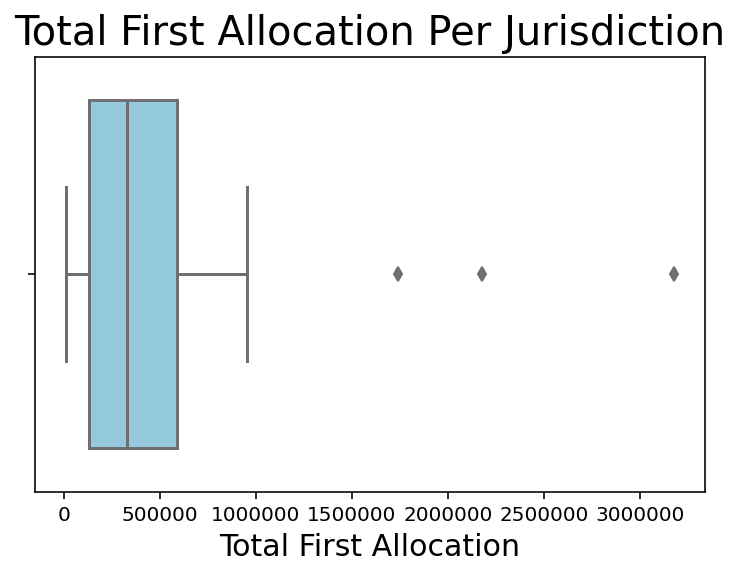

In [32]:
sns.boxplot(x=vaccine['total_first_allocation'],color='skyblue')
plt.ticklabel_format(style='plain',axis='x')
plt.title('Total First Allocation Per Jurisdiction', size=20)
plt.xlabel('Total First Allocation',size=15);

# there are 3 jurisdictions has way more allocations than other jurisdiction

In [12]:
vaccine.sort_values(by=['total_first_allocation'], ascending=False)[:3]

# California has the most allocation, then it's Texas and Florida.

,jurisdiction,hhs_region,doses_allocated_12_14,doses_allocated_12_21,doses_allocated_12_28,doses_allocated_01_04,doses_allocated_01_10,doses_allocated_01_18,total_first_allocation
4,California,Region 9,327600,905625,529675,463450,465325,485800,3177475
47,Texas,Region 6,224250,620400,362875,317425,319000,332850,2176800
10,Florida,Region 4,179400,495625,289925,253350,254825,266100,1739225


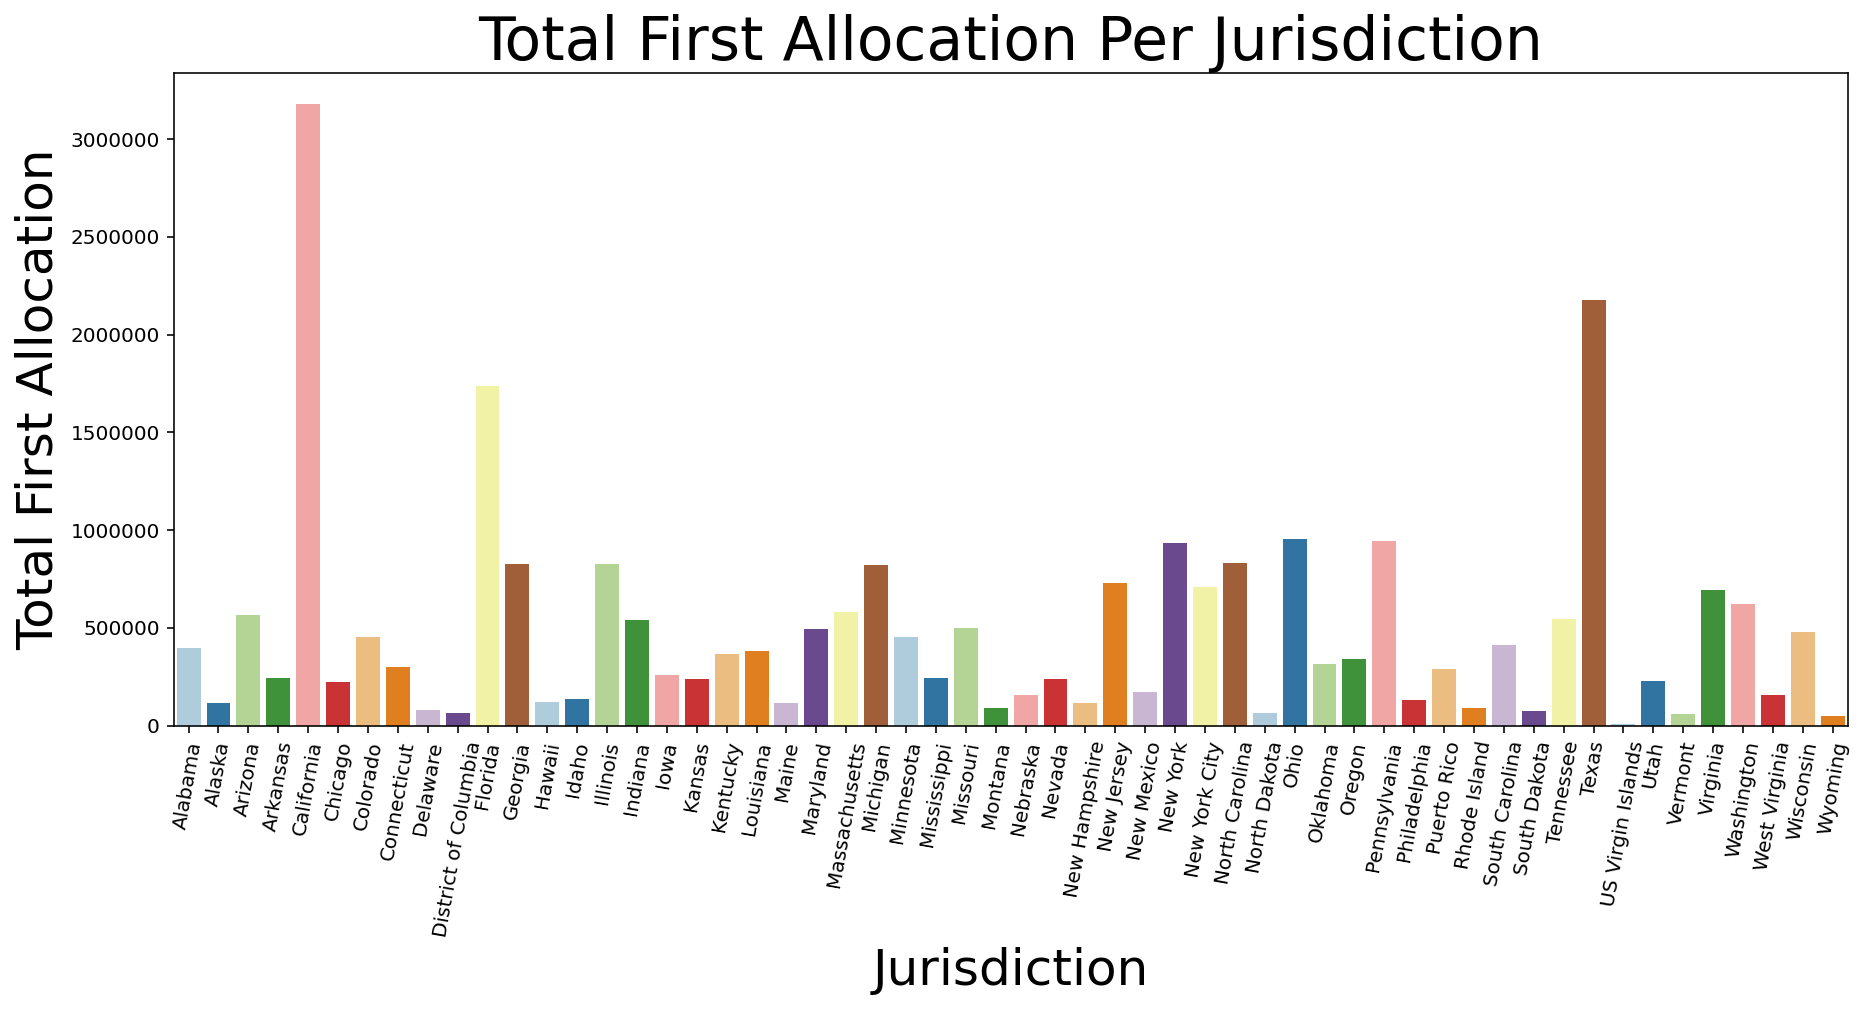

In [57]:
plt.figure(figsize=(15,6))
sns.barplot(data=vaccine,y=vaccine['total_first_allocation'],x=vaccine['jurisdiction'],
            palette='Paired')
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel("Jurisdiction",size=25)
plt.ylabel("Total First Allocation",size=25)
plt.title('Total First Allocation Per Jurisdiction',size=30)

plt.xticks(rotation=80);

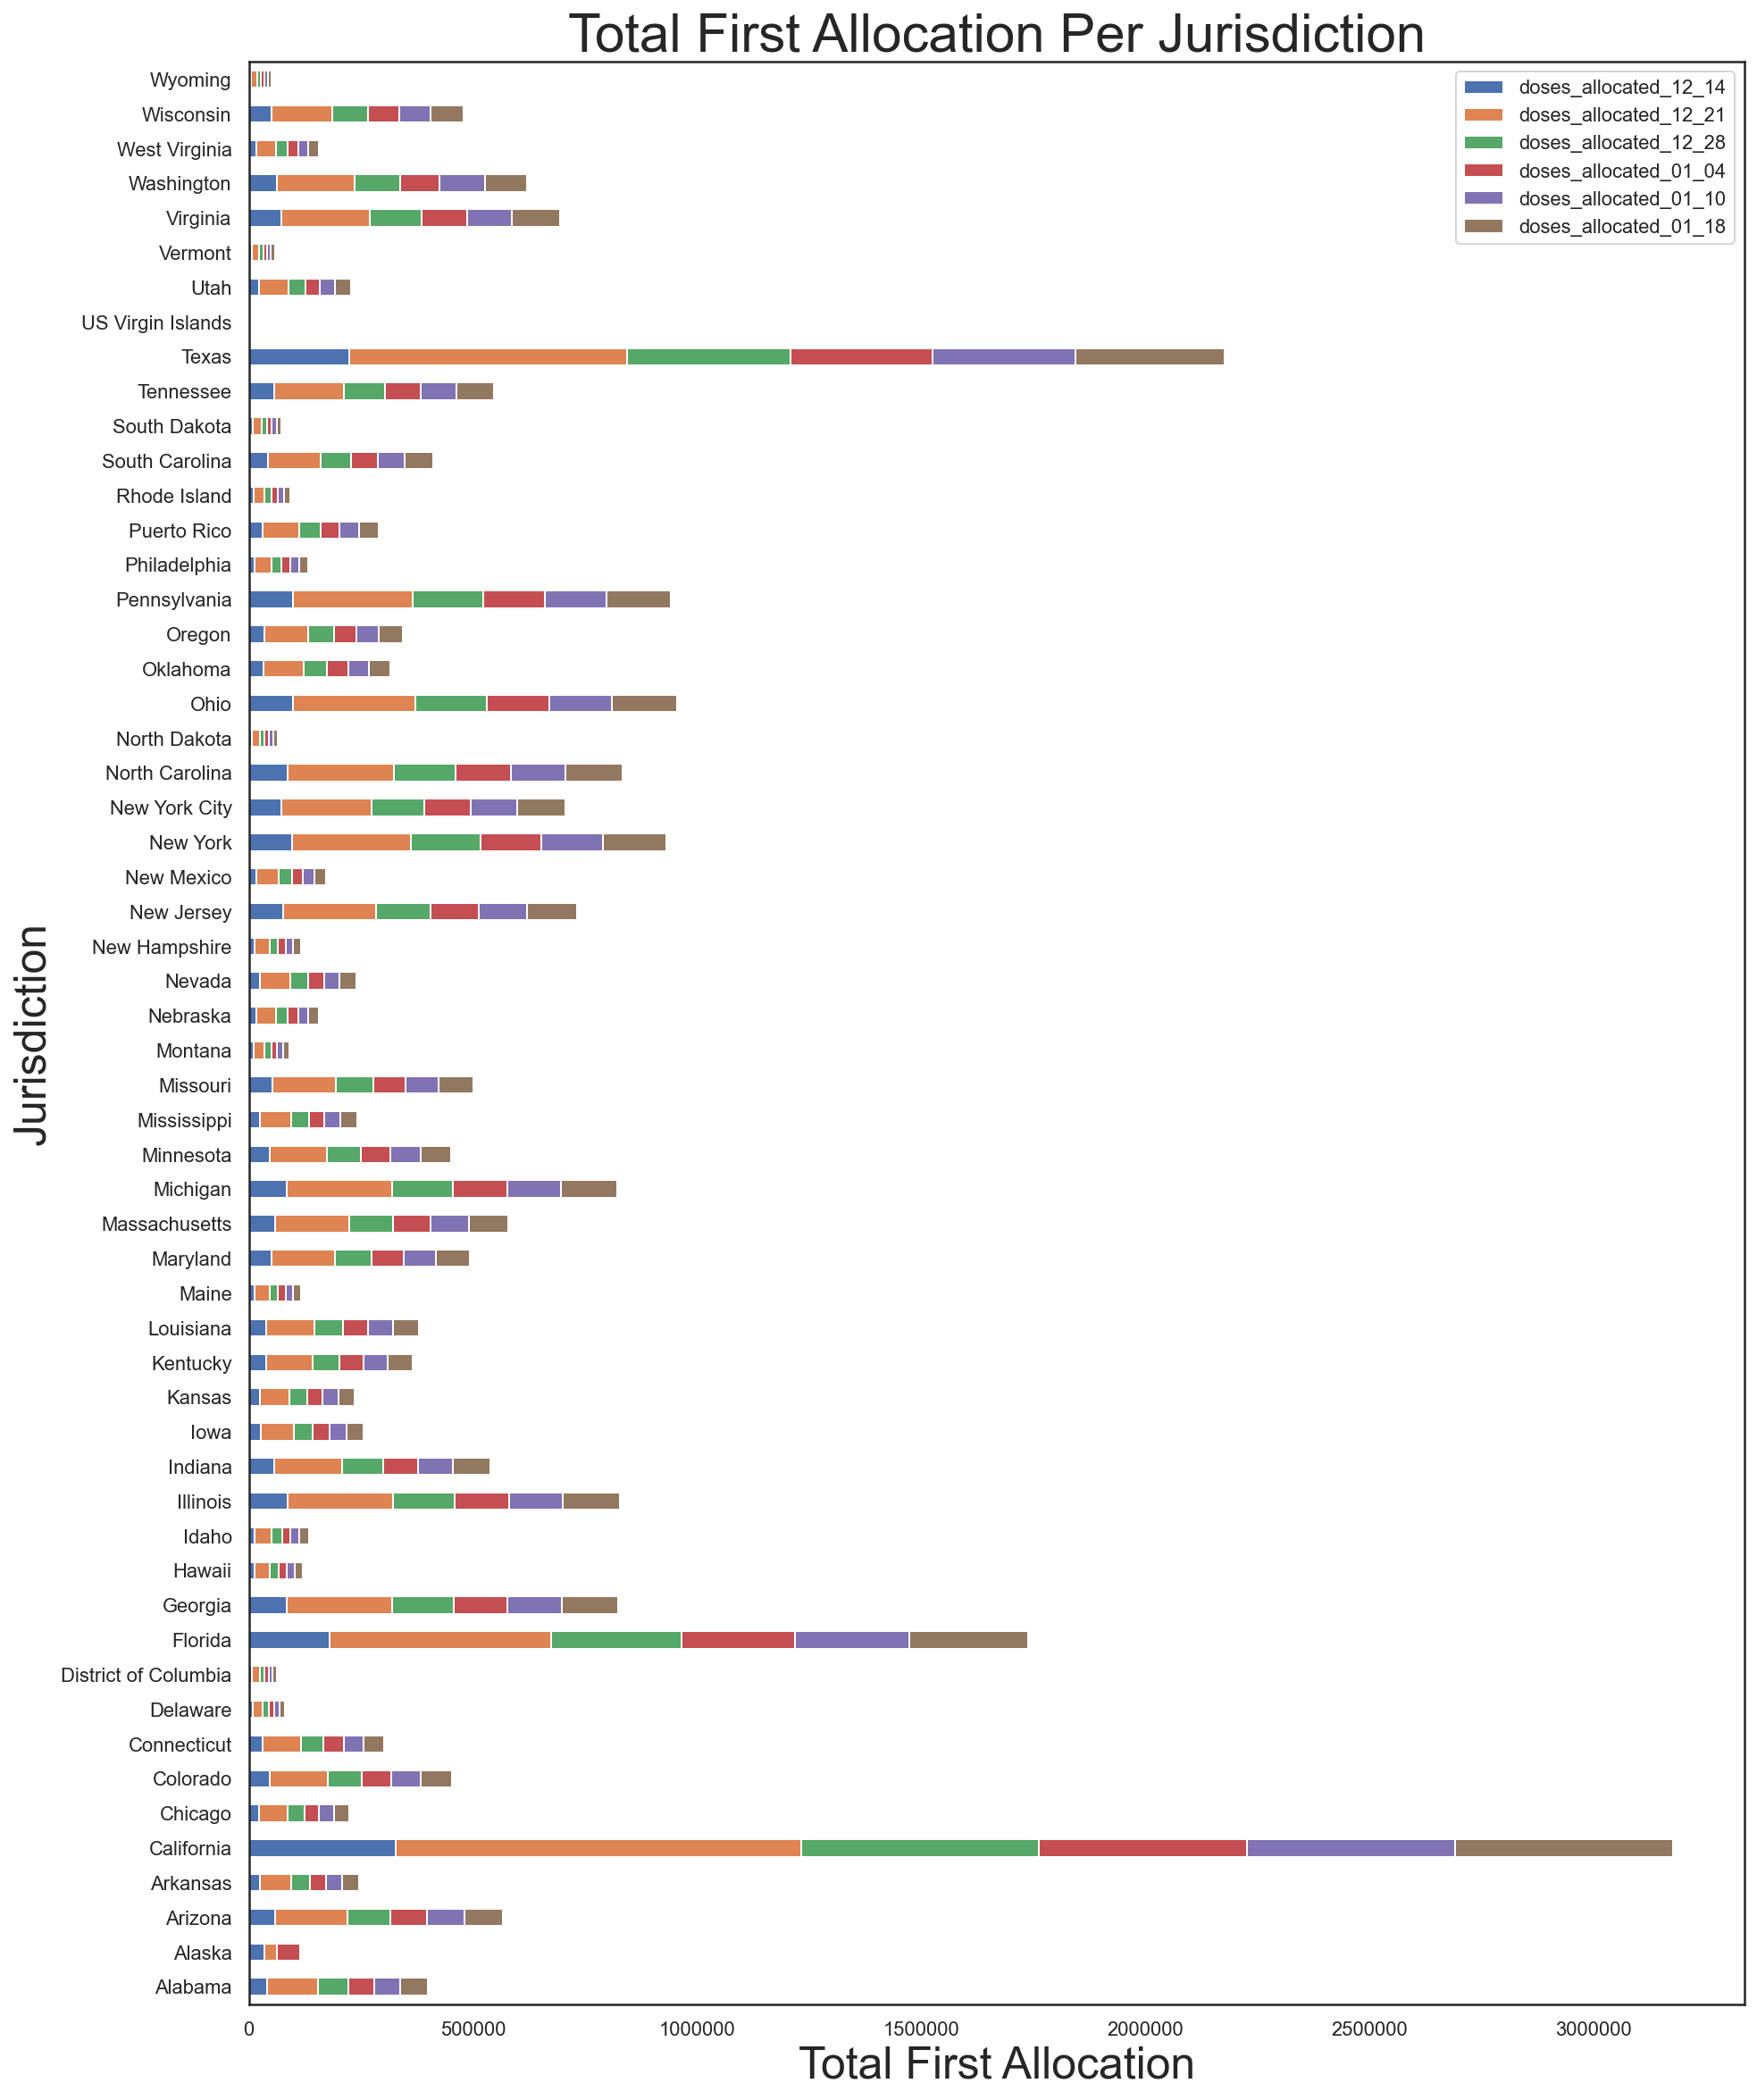

In [69]:
sns.set(style='white')
ax=vaccine.drop(columns='total_first_allocation').plot.barh(stacked=True,figsize=(15,20))
plt.ticklabel_format(style='plain',axis='x')
ax.set_yticklabels(vaccine.jurisdiction)
plt.ylabel("Jurisdiction",size=25)
plt.xlabel("Total First Allocation",size=25)
plt.title('Total First Allocation Per Jurisdiction',size=30);


In [84]:
vaccine_sort=vaccine.sort_values(by=['total_first_allocation'], ascending=False)
vaccine_sort.head()

,jurisdiction,hhs_region,doses_allocated_12_14,doses_allocated_12_21,doses_allocated_12_28,doses_allocated_01_04,doses_allocated_01_10,doses_allocated_01_18,total_first_allocation
4,California,Region 9,327600,905625,529675,463450,465325,485800,3177475
47,Texas,Region 6,224250,620400,362875,317425,319000,332850,2176800
10,Florida,Region 4,179400,495625,289925,253350,254825,266100,1739225
37,Ohio,Region 5,98475,272100,159400,139700,139900,146325,955900
40,Pennsylvania,Region 3,97500,268025,157425,137625,137925,143275,941775


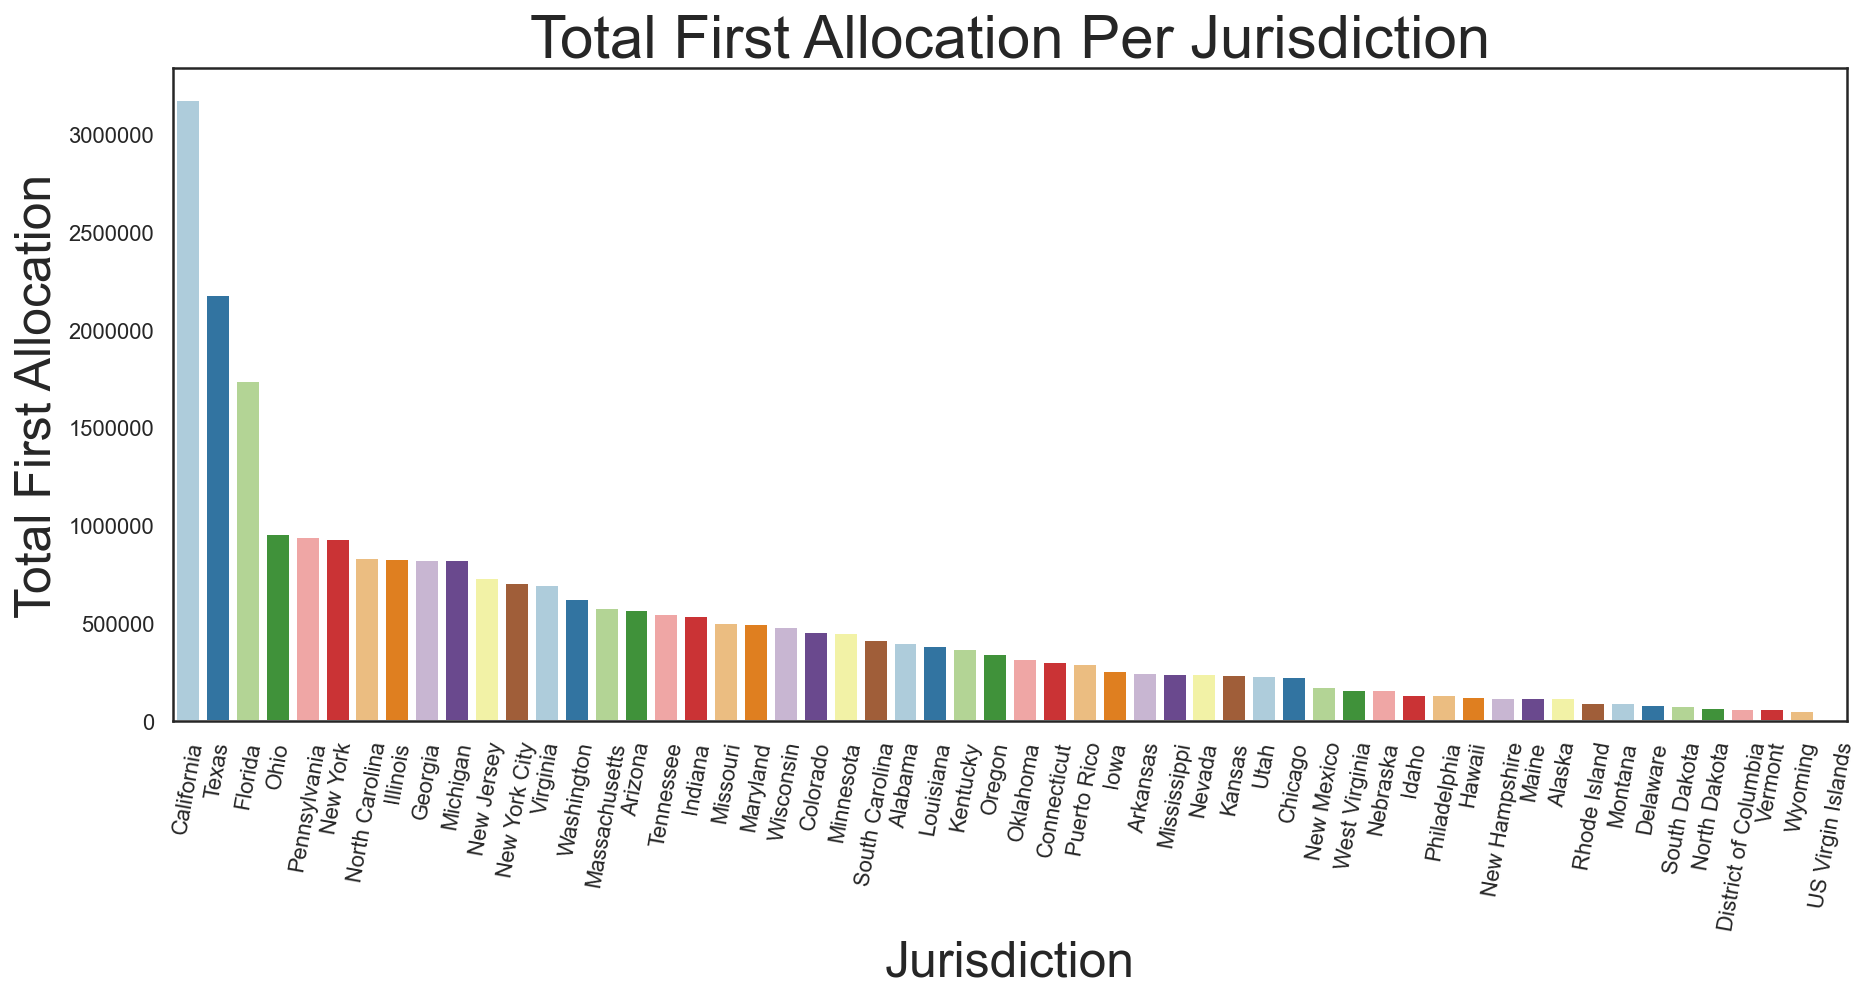

In [116]:
plt.figure(figsize=(15,6))
sns.barplot(data=vaccine_sort,
            y=vaccine_sort['total_first_allocation'],x=vaccine_sort['jurisdiction'],
            palette='Paired')#,order=vaccine_sort.jurisdiction)
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel("Jurisdiction",size=25)
plt.ylabel("Total First Allocation",size=25)
plt.title('Total First Allocation Per Jurisdiction',size=30)

plt.xticks(rotation=80);

In [135]:
vaccine_sort_no_total=vaccine.sort_values(by=['total_first_allocation'], ascending=True).drop(columns='total_first_allocation')
vaccine_sort_no_total=vaccine_sort_no_total.set_index('jurisdiction')

<Figure size 432x288 with 0 Axes>

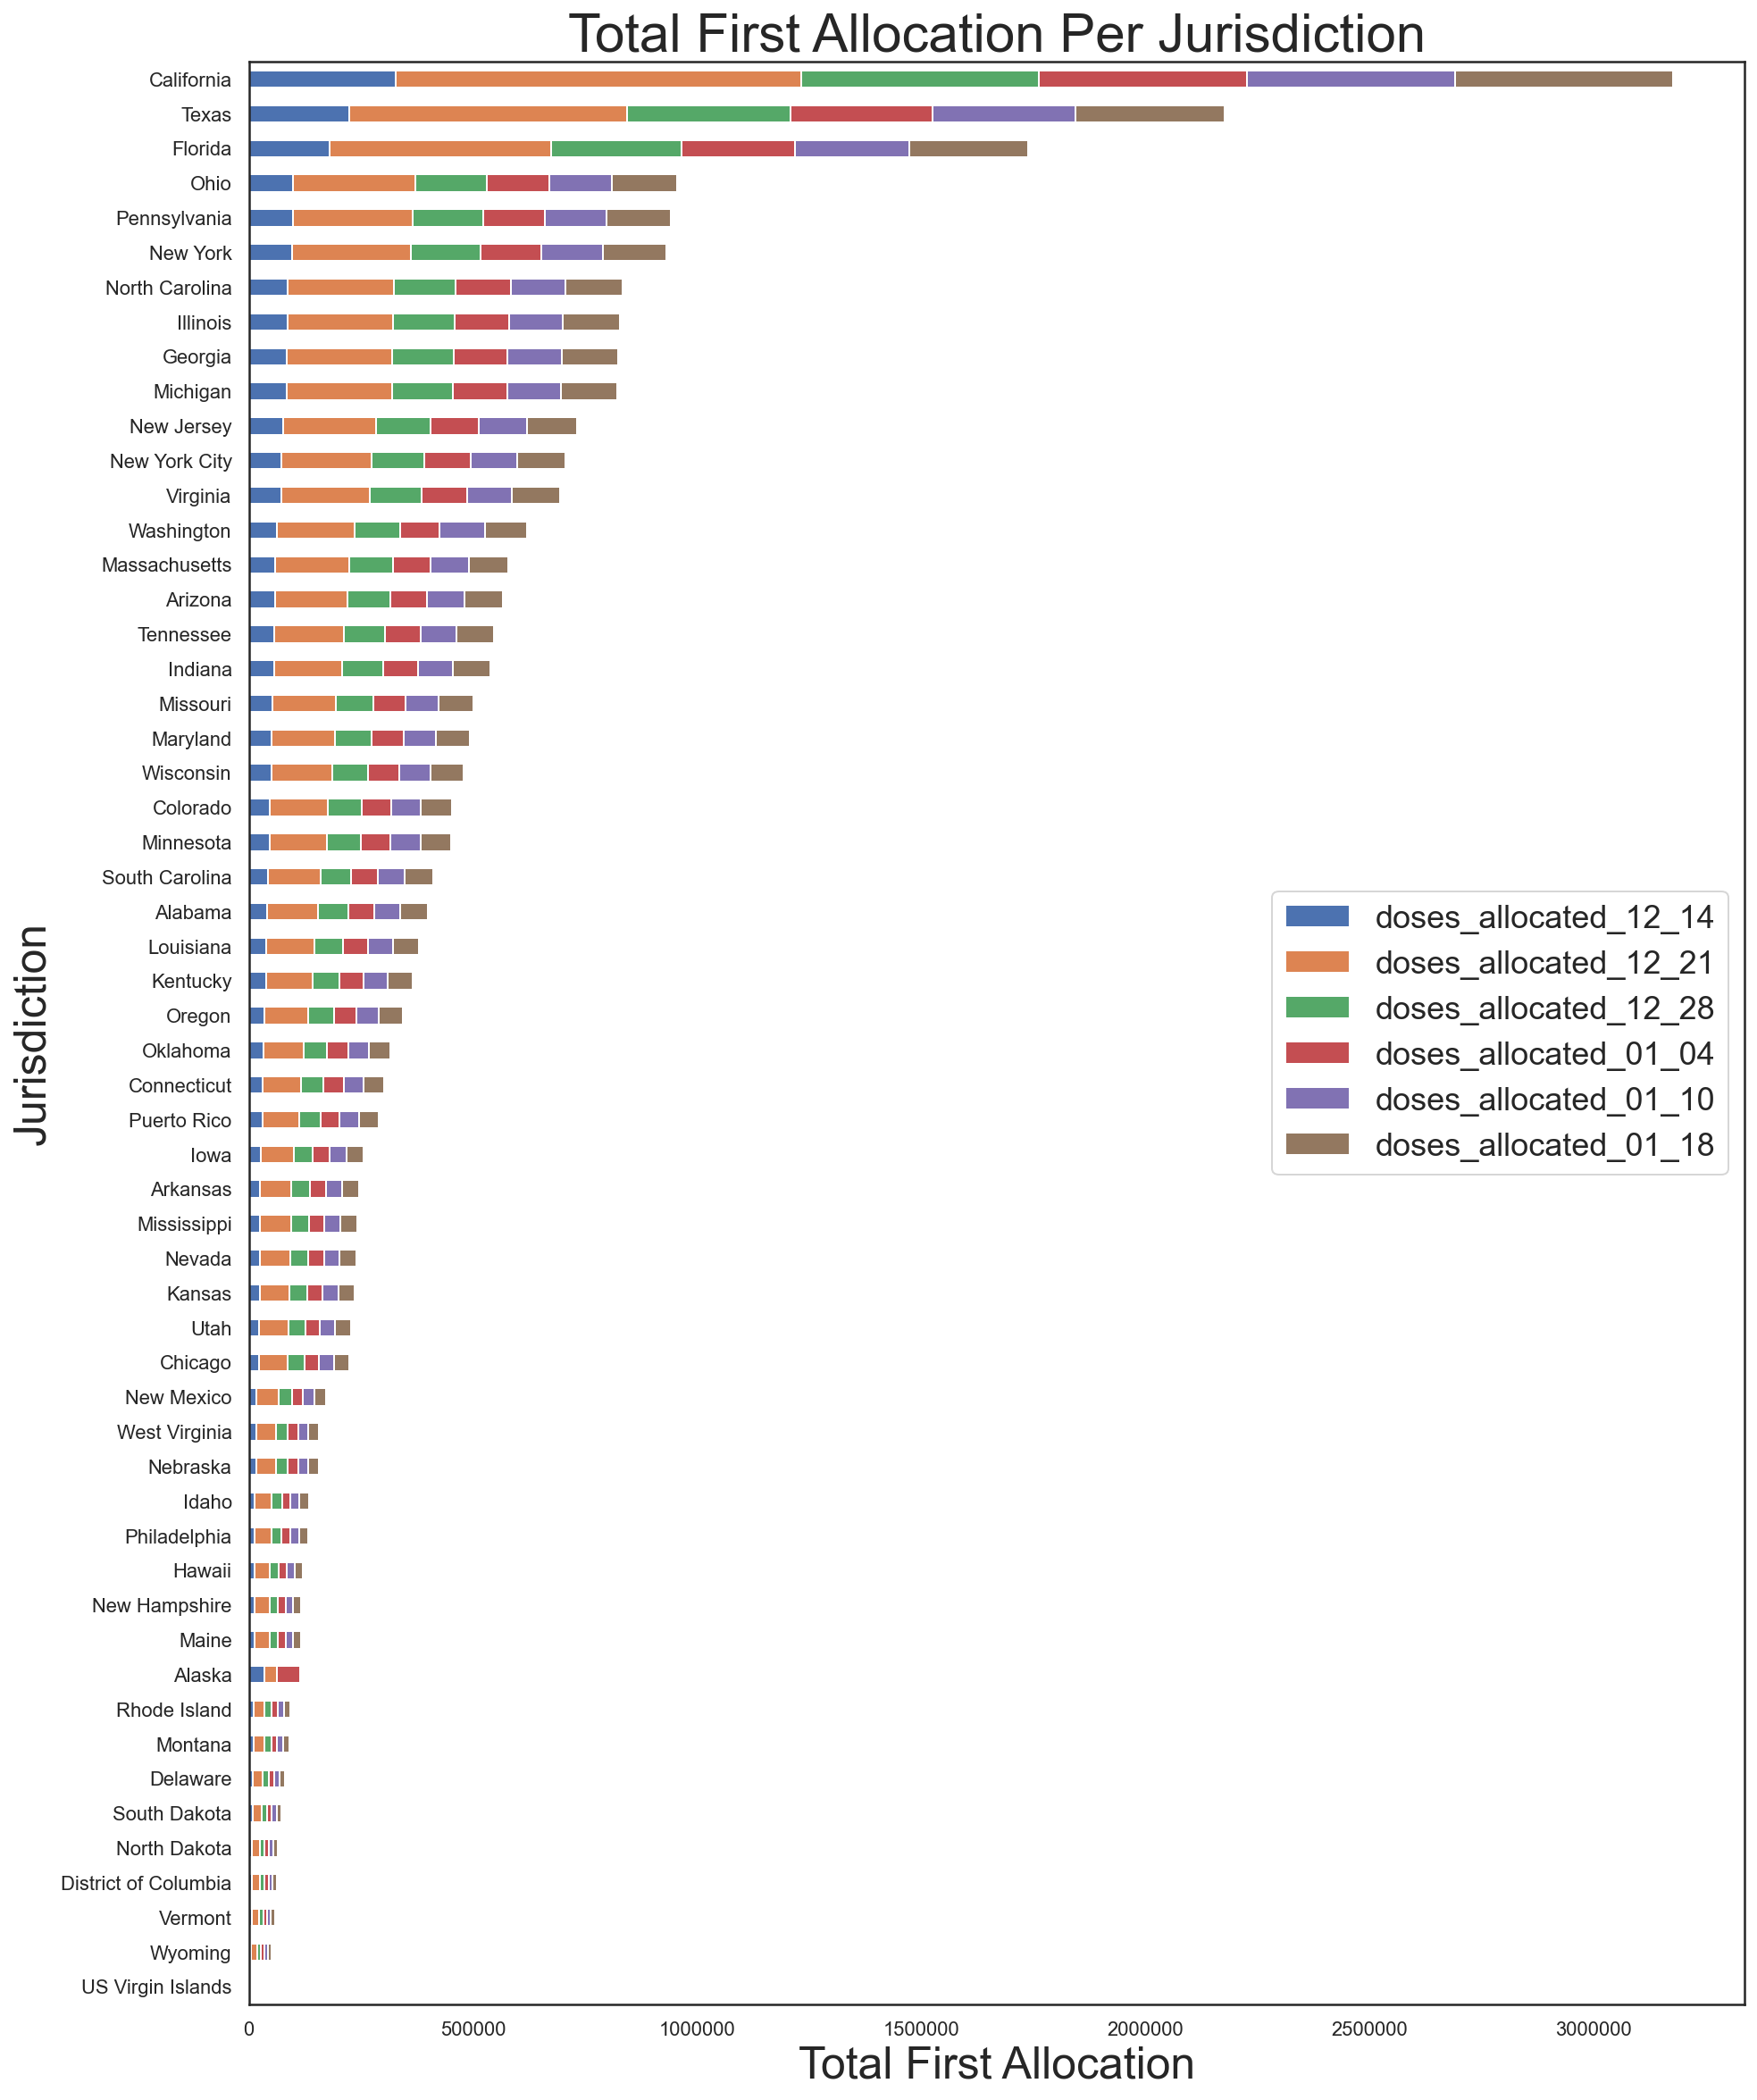

In [150]:
sns.set(style='white')
ax=vaccine_sort_no_total.plot(kind='barh',stacked=True,figsize=(15,20))
plt.ticklabel_format(style='plain',axis='x')
ax.set_yticklabels(vaccine_sort_no_total.index)
plt.ylabel("Jurisdiction",size=25)
plt.xlabel("Total First Allocation",size=25)
plt.title('Total First Allocation Per Jurisdiction',size=30)
plt.legend(fontsize=18,loc='center right');

In [151]:
# fig = plt.figure()
#fig.savefig('pic.png')